<a href="https://colab.research.google.com/github/AmitanshuT/Machine-Learning/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/Telco-Customer-Churn.csv')

In [ ]:
df.dtypes
#Attributes and Data Types below.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Data type for Total Charges is Object. Converted for statistical operations.

#pd.to_numeric(df['TotalCharges'], errors='raise')
#ValueError: Unable to parse string " " at position 488
#So, repeating command, but with instruction to replace " " with NaN at row# 488

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dtypes #TotalCharges column is converted to numeric

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#Finding ranges for Monthly Charges and TotalCharges
print(df['MonthlyCharges'].max())
print(df['MonthlyCharges'].min())
#118.75 to 18.25

print(df['TotalCharges'].max())
print(df['TotalCharges'].min())
#8684.8 to 18.8

#Finding distict values for Columns with Categorical variables
column_labels=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

118.75
18.25
8684.8
18.8


In [ ]:
for column_label in column_labels:
    unique_values = df[column_label].unique()
    print(column_label, unique_values)
## This also checks for invalid data. Data for these columns is clean.

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


Text(0, 0.5, 'Tenure')

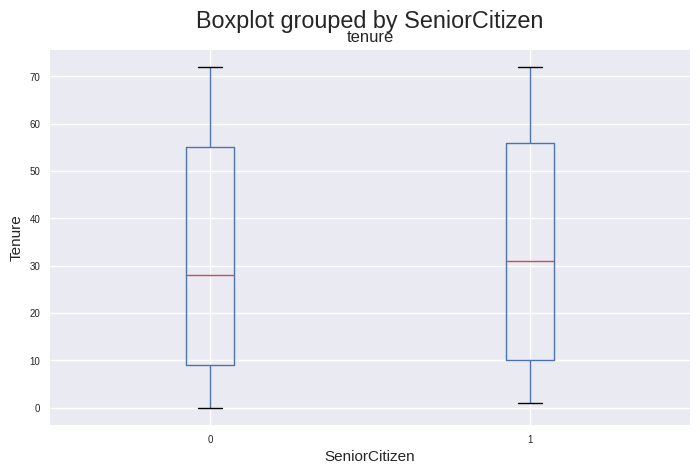

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create a Box-plot -  Tenure vs SeniorCitizen
BoxPlot_1 = df.boxplot(column="tenure", by="SeniorCitizen", figsize=(8,5),
                       fontsize=(7))
BoxPlot_1.set_ylabel("Tenure")
#Below shows that Median Tenure is only marginally higher for Senior Citizen.

Text(0, 0.5, 'TotalCharges')

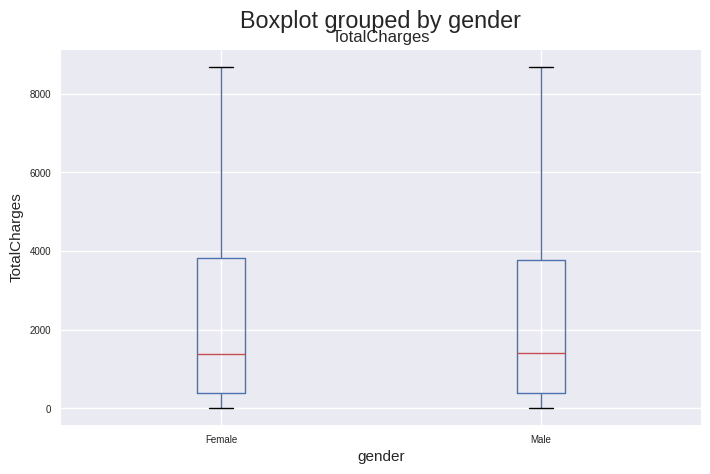

In [ ]:
#Create a Box-plot -  TotalCharges vs Gender
BoxPlot_2 = df.boxplot(column="TotalCharges", by="gender", figsize=(8,5),
                       fontsize=(7))
BoxPlot_2.set_ylabel("TotalCharges")
#Below demonstrates that Total spend is similar across genders.

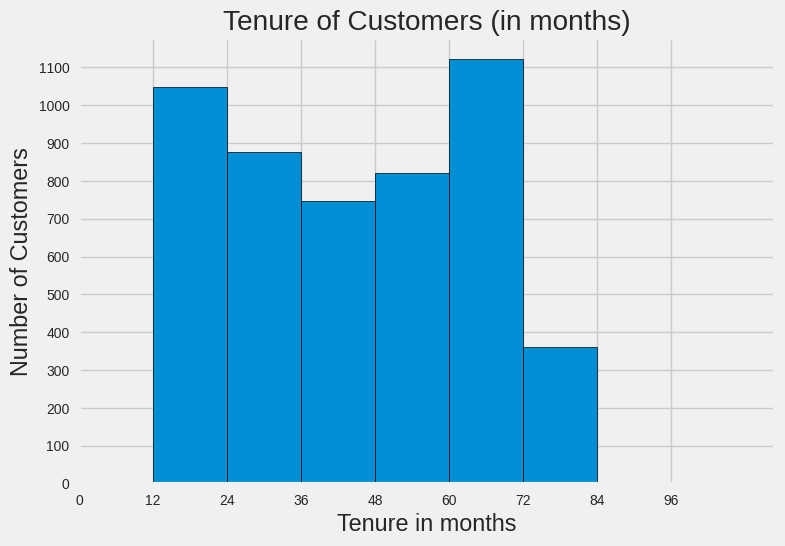

In [ ]:
#Create a Histogram to understand typical Tenures of customers
plt.style.use('fivethirtyeight')
IDs=df['customerID']
Tenure=df['tenure']
Bins=[12,24,36,48,60,72,84,96,108]
plt.hist(Tenure,bins=Bins, edgecolor='black')
plt.title('Tenure of Customers (in months)')
plt.xlabel('Tenure in months')
plt.ylabel('Number of Customers')
plt.xticks(np.arange(0,108, step=12))
plt.yticks(np.arange(0,1200, step=100))
plt.rcParams["figure.figsize"] = [3.00, 5]
#Below shows a sharp drop after 6 years of Tenure. Could correlate with Churn.

<ipython-input-37-1daaa1ccf313>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


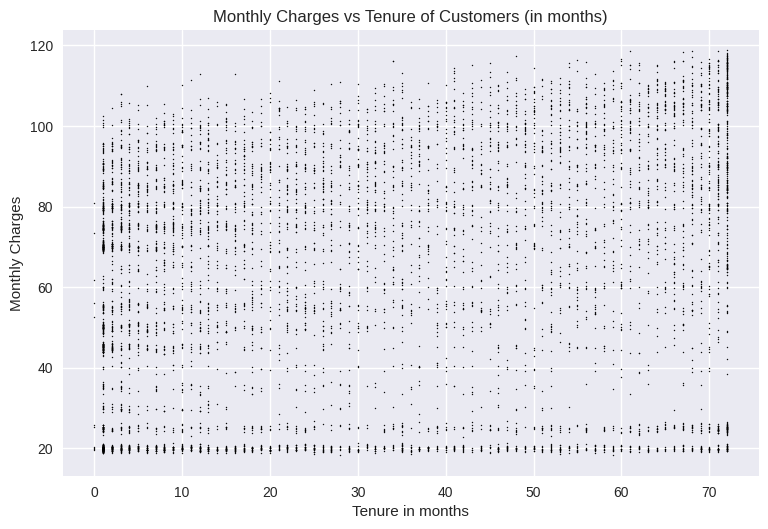

In [ ]:
#Create a Scatter Plot to check for trends and correlations
plt.style.use('seaborn')
#For example, looking for correlation between tenure and monthly consumption
x=df['tenure']
y=df['MonthlyCharges']
plt.xlabel('Tenure in months')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs Tenure of Customers (in months)')
plt.scatter(x, y, color= 'black', s=0.5)
#As per below, no correlation is evident between tenure and monthly consumption.

Text(0.5, 1.0, 'Q-Q Plot')

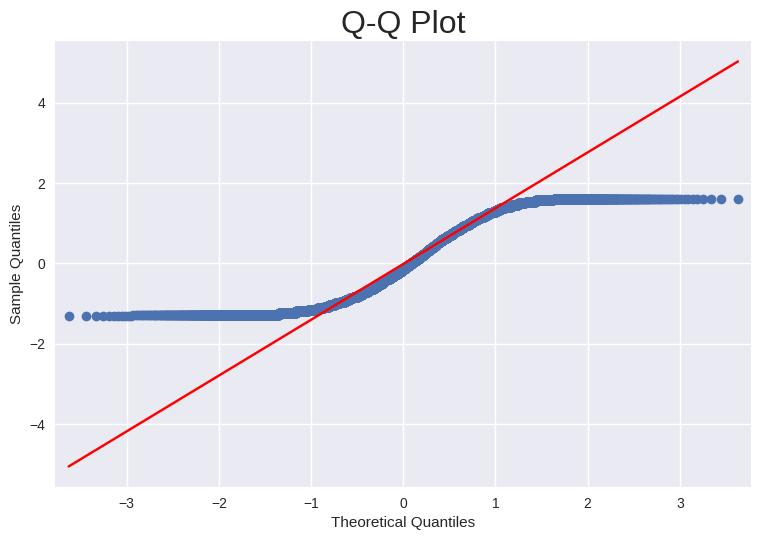

In [ ]:
#Create a Q-Q Plot for Tenure
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
# Random data points generated
data_points = np.random.normal(0, 1, 100)
fig=plt.figure()
ax=fig.add_subplot(111)
fig=sm.qqplot(df['tenure'], dist=stats.norm, fit=True, line='q', ax=ax)
ax.set_title('Q-Q Plot', fontsize= 23)
#Below indicates that Tenure data does not follow a normal distribution.
#Tenure Data has more outliers in the tails.

In [ ]:
#Now I will try to find which type of customers are more likely to churn.
#One option is to find frequency of Churn for different Categorical Values.
df_1 = pd.crosstab(df['Churn'],df['gender'])
df_2 = pd.crosstab(df['Churn'], df['SeniorCitizen']).add_prefix(
    'SeniorCitizen_')
df_3 = pd.crosstab(df['Churn'], df['Partner']).add_prefix('Partner_')
df_4 = pd.crosstab(df['Churn'], df['Dependents']).add_prefix('Dependents_')
df_5 = pd.crosstab(df['Churn'], df['PhoneService']).add_prefix(
    'PhoneService_')
df_6 = pd.crosstab(df['Churn'], df['MultipleLines']).add_prefix(
    'MultipleLines_')
df_7 = pd.crosstab(df['Churn'], df['InternetService']).add_prefix(
    'InternetService_')
df_8 = pd.crosstab(df['Churn'], df['OnlineSecurity']).add_prefix(
    'OnlineSecurity_')
df_9 = pd.crosstab(df['Churn'], df['OnlineBackup']).add_prefix(
    'OnlineBackup_')
df_10 = pd.crosstab(df['Churn'], df['DeviceProtection']).add_prefix(
    'DeviceProtection_')
df_11 = pd.crosstab(df['Churn'], df['TechSupport']).add_prefix(
    'TechSupport_')
df_12 = pd.crosstab(df['Churn'], df['StreamingTV']).add_prefix(
    'StreamingTV_')
df_13 = pd.crosstab(df['Churn'], df['StreamingMovies']).add_prefix(
    'StreamingMovies_')
df_14 = pd.crosstab(df['Churn'], df['Contract']).add_prefix('Contract_')
df_15 = pd.crosstab(df['Churn'], df['PaperlessBilling']).add_prefix(
    'PaperlessBilling_')
df_16 = pd.crosstab(df['Churn'], df['PaymentMethod']).add_prefix(
    'PaymentMethod_')

df_churn = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,
                      df_12,df_13,df_14,df_15,df_16], axis=1)
df_churn_transposed = df_churn.transpose()
df_Churn_Percent = df_churn_transposed.assign(
    Percent_Churn=((df_churn_transposed.Yes)/(
        df_churn_transposed.Yes+df_churn_transposed.No)).map('{:.2%}'.format))
print(df_Churn_Percent) #Churn for different scenarios below
#Highest Churn (around 40%) for -
#Senior Citizen, Fiber optic Customers, Customers with no Online Security,
#no Online Backup, no device protection,no Tech Support, Month-to month contract
# and finally, customers paying via Electronic Check

Churn                                      No   Yes Percent_Churn
Female                                   2549   939        26.92%
Male                                     2625   930        26.16%
SeniorCitizen_0                          4508  1393        23.61%
SeniorCitizen_1                           666   476        41.68%
Partner_No                               2441  1200        32.96%
Partner_Yes                              2733   669        19.66%
Dependents_No                            3390  1543        31.28%
Dependents_Yes                           1784   326        15.45%
PhoneService_No                           512   170        24.93%
PhoneService_Yes                         4662  1699        26.71%
MultipleLines_No                         2541   849        25.04%
MultipleLines_No phone service            512   170        24.93%
MultipleLines_Yes                        2121   850        28.61%
InternetService_DSL                      1962   459        18.96%
InternetSe

In [ ]:
#Another way of assessing Churn
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as ab
import scipy
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

Input=df
#Encode non-numerical categories, and build a new table
le_gender = LabelEncoder()
le_SeniorCitizen = LabelEncoder()
le_Partner = LabelEncoder()
le_Dependents = LabelEncoder()
le_PhoneService = LabelEncoder()
le_MultipleLines = LabelEncoder()
le_InternetService = LabelEncoder()
le_OnlineSecurity = LabelEncoder()
le_OnlineBackup = LabelEncoder()
le_DeviceProtection = LabelEncoder()
le_TechSupport = LabelEncoder()
le_StreamingTV = LabelEncoder()
le_StreamingMovies = LabelEncoder()
le_Contract = LabelEncoder()
le_PaperlessBilling = LabelEncoder()
le_PaymentMethod = LabelEncoder()
le_Churn = LabelEncoder()

Input['gender_n']=le_gender.fit_transform(Input['gender'])
Input['SeniorCitizen_n']=le_SeniorCitizen.fit_transform(Input['SeniorCitizen'])
Input['Partner_n']=le_Partner.fit_transform(Input['Partner'])
Input['Dependents_n']=le_Dependents.fit_transform(Input['Dependents'])
Input['PhoneService_n']=le_PhoneService.fit_transform(Input['PhoneService'])
Input['MultipleLines_n']=le_MultipleLines.fit_transform(Input['MultipleLines'])
Input['InternetService_n']=le_InternetService.fit_transform(
    Input['InternetService'])
Input['OnlineSecurity_n']=le_OnlineSecurity.fit_transform(
    Input['OnlineSecurity'])
Input['OnlineBackup_n']=le_OnlineBackup.fit_transform(Input['OnlineBackup'])
Input['DeviceProtection_n']=le_DeviceProtection.fit_transform(
    Input['DeviceProtection'])
Input['TechSupport_n']=le_TechSupport.fit_transform(Input['TechSupport'])
Input['StreamingTV_n']=le_StreamingTV.fit_transform(Input['StreamingTV'])
Input['StreamingMovies_n']=le_StreamingMovies.fit_transform(
    Input['StreamingMovies'])
Input['Contract_n']=le_Contract.fit_transform(Input['Contract'])
Input['PaperlessBilling_n']=le_PaperlessBilling.fit_transform(
    Input['PaperlessBilling'])
Input['PaymentMethod_n']=le_PaymentMethod.fit_transform(Input['PaymentMethod'])
Input['Churn_n']=le_Churn.fit_transform(Input['Churn'])

Input_n = Input.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis='columns')

#Looking for Correlations
Input_n.corr()

<ipython-input-71-48f13b560b55>:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Input_n.corr()


,tenure,MonthlyCharges,TotalCharges,gender_n,SeniorCitizen_n,Partner_n,Dependents_n,PhoneService_n,MultipleLines_n,InternetService_n,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
tenure,1.000000,0.247900,0.825880,0.005106,0.016567,0.379697,0.159712,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,-0.014569,0.220173,0.096848,-0.113890,0.247398,0.433576,-0.323260,-0.053878,0.119777,0.163652,-0.008682,0.336706,0.335459,-0.074195,0.352150,-0.193407,0.193356
TotalCharges,0.825880,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.113008,0.453202,-0.175691,0.254473,0.375556,0.389066,0.276890,0.392472,0.398088,0.450306,0.157830,-0.330594,-0.199484
gender_n,0.005106,-0.014569,0.000048,1.000000,-0.001874,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.008612
SeniorCitizen_n,0.016567,0.220173,0.102411,-0.001874,1.000000,0.016479,-0.211185,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.150889
Partner_n,0.379697,0.096848,0.319072,-0.001808,0.016479,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,-0.150448
Dependents_n,0.159712,-0.113890,0.064653,0.010517,-0.211185,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.164221
PhoneService_n,0.008448,0.247398,0.113008,-0.006488,0.008576,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.011942
MultipleLines_n,0.343032,0.433576,0.453202,-0.006739,0.146185,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.038037
InternetService_n,-0.030359,-0.323260,-0.175691,-0.000863,-0.032310,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.047291


<ipython-input-72-e0742b30c16d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ab.heatmap(Input_n.corr(), annot=True, cmap="coolwarm")


<Axes: >

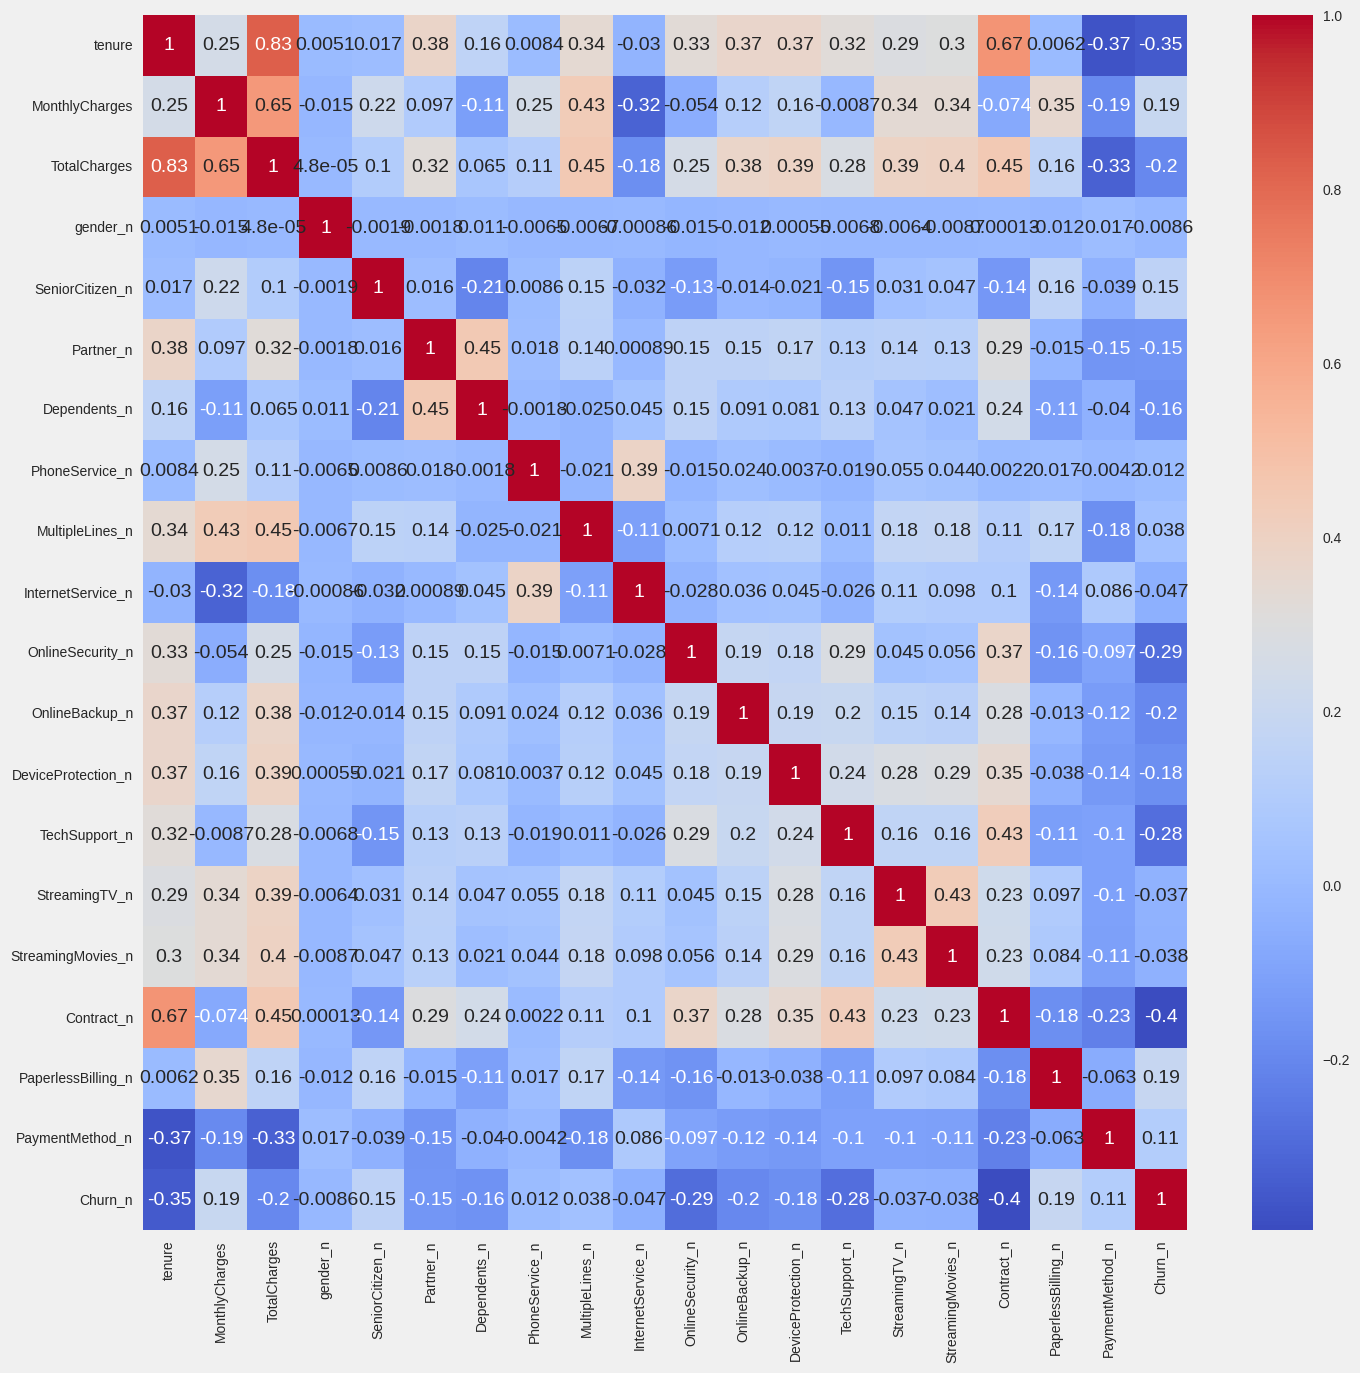

In [ ]:
#Correlation Heatmap. This also indicates which Type of Customers are
#more likely to Churn.
plt.figure(figsize=(15,15))
ab.heatmap(Input_n.corr(), annot=True, cmap="coolwarm")
#Observations from below heat map-
#Churn has high negative correlation with Tenure and Contract type.
#Tenure is highly positively correlated with Total Charges and Contract type.